- How indexing works in sets
- Why dict key cant be mutable data types
- Enumerate
- destructor
- dir/isinstance/issubclass
- classmethod vs staticmethod
- The diamond problem
- What’s the meaning of single and double underscores in Python variable and method names
- Magic Methods (repr vs str)
- How can objects be stored in sets even though they are mutable

# How indexing works in sets

In [ ]:
s = {21,34,11,56,39}
s

{11, 21, 34, 39, 56}

###  Set provide index to the stored item based on hashing technique.
Hashing use hash function (x%size)

Let s={10,34,55,22,13}  size=5

10%5=0 So, 10 will get stored in index 0.

34%5=4 So, 10 will get stored in index 4.

55%5=0 So, 10 will get stored in index 1 (empty space left next to 0 index).

22%5=2 So, 10 will get stored in index 2.

13%5=3 So, 10 will get stored in index 3.

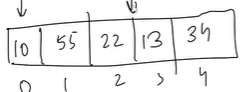

### hashing in case of string in sets

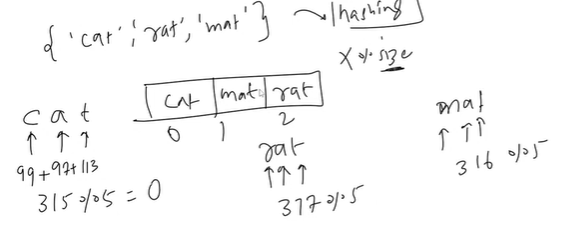

In case of string value ascii value will be used for calcution.

Two mothods of hashing(during collision):
1) Probing 2) chaining

### Benefit of hashing:
Searching becomes O(1)

### Dictionary always takes contant time in searching.

# Why dict key cant be mutable data types

In [ ]:
d = {(1,2,3):'nitish'}
d

{(1, 2, 3): 'nitish'}

In [ ]:
d = {[1,2,3]:'nitish'} # key cannot be mutable
d

TypeError: ignored

### The reason is hashing has implemented in dictionary to store items in memory. Hashing function works on keys of dictionary.

### They took the output of hashing and know about the index and store the items on that memory address.

### So if we take mutable key value then its hash output will also gets change.Then again we have to shift items to new index location. This will become combursom.

### Thatwhy python does not allow mutable datatype as keys.


# Enumerate

In [ ]:
# enumerate
# The enumerate() method adds a counter to an iterable and returns it (the enumerate object).
L = [('nitish',45),('ankit',31),('ankita',40)]

sorted(L,key=lambda x:x[1],reverse=True) # arrange in descending order based on second item

[('nitish', 45), ('ankita', 40), ('ankit', 31)]

In [1]:
L = [15,21,13,3]
sorted(list(enumerate(L)))

[(0, 15), (1, 21), (2, 13), (3, 3)]

In [4]:
L = [15,21,13,13]
sorted(list(enumerate(L,start=2))) # we can change the starting value of counter

[(2, 15), (3, 21), (4, 13), (5, 13)]

In [ ]:
L = [15,21,13,13]
sorted(list(enumerate(L)),reverse=True)

[(3, 13), (2, 13), (1, 21), (0, 15)]

# Destructor

In [ ]:
# destructor
class Example:

  def __init__(self):
    print('constructor called')

  # destructor : This magic method will get called when all objects gets remove from memory
  def __del__(self): # we generally write configuration related code and at this time
    print('destructor called')   # we write function like removing database connectivity, closing a file, close internet or bluetooth connectivity

obj = Example()
a = obj
del obj
del a # destructor will not get called untill all object gets delete from memory
# After deleting both object destructor will be called.

constructor called
destructor called


# dir/isinstance/issubclass

In [ ]:
# dir: It will list all 3 attributes (private/public variables, private/public methods, private/public magic methods) of a class

class Test:
    def __init__(self):
        self.foo = 11
        self._bar = 23
        self.__baz = 23

    def greet(self):
      print('hello')

t = Test()
print(dir(t)) # This gives us a list with the object’s attributes

['_Test__baz', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_bar', 'foo', 'greet']


### Name- mangling: It means when we create a private variable then in memory ita name gets changed automatically by _classname__variablename

In [ ]:
# isinstance

class Example:

  def __init__(self):
    print('hello')

obj = Example()

isinstance(obj,Example)

hello


True

In [5]:
# issubclass
class A:
  def __init__(self):
    pass

class B(A):
  pass

print(issubclass(B,A))
print(issubclass(A,B))

True
False


# classmethod vs staticmethod

### classmethod
- A class method is a method that is bound to the class and not the object of the class.
- They have the access to the state of the class as it takes a class parameter that points to the class and not the object instance.
- It can modify a class state that would apply across all the instances of the class. For example, it can modify a class variable that will be applicable to all the instances.

### staticmethod
A static method does not receive an implicit first argument. A static method is also a method that is bound to the class and not the object of the class. This method can’t access or modify the class state. It is present in a class because it makes sense for the method to be present in class.

In [ ]:
class A:

  def normal_m(self):
    print('normal method')

  @staticmethod
  def static_m():
    print('static method')

  @classmethod
  def class_m(cls):
    print('class method')

In [ ]:
a = A()

# normal -> object -> callable
a.normal_m()
# class -> object -> callable
a.class_m()
# static -> object -> not callable
a.static_m()

normal method
class method
static method


In [ ]:
# static -> class -> callable
A.static_m()
# class method -> class -> callable
A.class_m()
# normal -> class -> not callable
A.normal_m()

static method
class method


TypeError: ignored

In [ ]:
# Alternate syntax
A.normal_m(a)

### Class method vs Static Method<br>
The difference between the Class method and the static method is:

- A class method takes cls as the first parameter while a static method needs no specific parameters.
- A class method can access or modify the class state while a static method can’t access or modify it.
- In general, static methods know nothing about the class state. They are utility-type methods that take some parameters and work upon those parameters. On the other hand class methods must have class as a parameter.
- We use @classmethod decorator in python to create a class method and we use @staticmethod decorator to create a static method in python.

### When to use the class or static method?
- We generally use the class method to create factory methods. Factory methods return class objects ( similar to a constructor ) for different use cases.
- We generally use static methods to create utility functions.

# The diamond problem

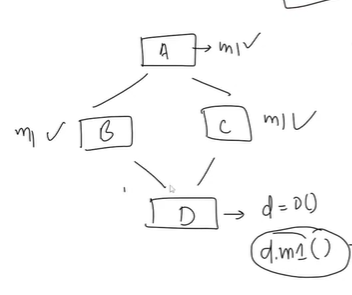

In [ ]:
# The diamond problem
class Class1:
    def m(self):
        print("In Class1")

class Class2(Class1):
    def m(self):
        print("In Class2")

class Class3(Class1):
    def m(self):
        print("In Class3")

class Class4(Class3, Class2):
    pass

obj = Class4()
obj.m()
# MRO

In Class3


# What’s the meaning of single and double underscores in Python variable and method names

* Single Leading Underscore: `_var`
* Single Trailing Underscore: `var_`
* Double Leading Underscore: `__var`
* Double Leading and Trailing Underscore: `__var__`
* Single Underscore: `_`

1. **Single Leading Underscore:** `_var` are a Python naming convention that indicates a name is meant for internal use. It is generally not enforced by the
Python interpreter and is only meant as a hint to the programmer.

 Adding a single underscore in front of a variable name is more like someone putting up a tiny underscore warning sign that says:

> “Hey, this isn’t really meant to be a part of the public interface of this class. Best to leave it alone.”

2. **Single Trailing Underscore:** var_ Sometimes the most fitting name for a variable is already taken by a keyword in the Python language. Therefore, names like class or def cannot be used as variable names in Python. In this case, you can append a single underscore to break the naming conflict:

3. **Double Leading Underscore**: `__var`

A double underscore prefix causes the Python interpreter to rewrite
the attribute name in order to avoid naming conflicts in subclasses.

This is also called *name mangling*—the interpreter changes the name
of the variable in a way that makes it harder to create collisions when
the class is extended later.

4. **Double Leading and Trailing Underscore**: `__var__`

Double underscores `__` are often referred to as “**dunders**” in the Python
community. The reason is that double underscores appear quite often
in Python code, and to avoid fatiguing their jaw muscles, Pythonistas
often shorten “**double underscore**” to “**dunder**.”

The names that have both leading and trailing double underscores are reserved for special use in the language. This rule covers things like `__init__` for object constructors, or `__call__` to make objects callable.

These dunder methods are often referred to as magic methods.

There are many dunder methods, here are some:-

`__str__, __repr__, __call__, __add__, __sub__, __len__` etc.

5. **Single Underscore** `_`:
 Sometimes used as a name for temporary or insignificant variables (“don’t care). Also, it represents the result of the last expression in a Python REPL session.

In [ ]:
class A:

  def __init__(self):
    self._var = 10

a = A()
a._var # it is just a way of saying thing to other to not access this var outside class although they can access it without any error.

10

In [6]:
def make_object(name, class):
    pass

SyntaxError: invalid syntax (<ipython-input-6-88a174f47223>, line 1)

In [7]:
def make_object(name, class_):
    pass

In [8]:
class Test:
    def __init__(self):
        self.foo = 11
        self._bar = 23
        self.__baz = 23

t = Test()
print(dir(t)) # This gives us a list with the object’s attributes

['_Test__baz', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_bar', 'foo']


# Magic Methods (repr vs str)

In [ ]:
# repr and other magic/dunder methods

a = 'hello'

print(str(a))
print(repr(a)) # repr means representation

hello
'hello'


In [9]:
import datetime

a = datetime.datetime.now()
b = str(a)

print(str(a)) # string is for reading
print(str(b))

print(repr(a))
print(repr(b)) # repr is for prevention of ambiguity

2024-07-24 21:29:04.117652
2024-07-24 21:29:04.117652
datetime.datetime(2024, 7, 24, 21, 29, 4, 117652)
'2024-07-24 21:29:04.117652'


### In summary

- str is for users -> meant to be more readable
- repr is for developers for debugging - > for being unambigous

# How can objects be stored in sets even though they are mutable

In [ ]:
# how objects are stored even though they are mutable
# https://stackoverflow.com/questions/31340756/python-why-can-i-put-mutable-object-in-a-dict-or-set
class A:

  def __init__(self):
    print('constructor')

  def hello(self):
    print('hello')

a = A()
a.hello()
s = {a} # set store immutable datatype but object is mutable datatype
print(s)
dir(a) # object contains hash dunder method

constructor
hello
{<__main__.A object at 0x7f4f5f3fd510>}


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'hello']

In [ ]:
s = {[1,2]} # Set doesnot say that we are giving mutable datatype, it says that we are giving unhashable datatype

TypeError: ignored

### The classes we make have a __hash__ magic method because of this our objects gets convert it into a hashable. So objects is both mutable and hashable now.

### Since object is hashable then we can store it into a set. Set only allow hashable object or datatype. Since list is not hashable then we cannot store it into a set.

### Hash function should always return an integer value, only then it will be considered as hashable.

In [ ]:
L = [1,2,3]
s = {L}

TypeError: ignored

### Object has hash function and it returns int value thatwhy it is hashable.

### List is also having hash fucntion but it does not return integer value. Thatswhy it is unhashable.

In [10]:
class A:

  def __init__(self):
    print('constructor')

  def hello(self):
    print('hello')

  def __hash__(self): # overriding the hash function and it does not return any integer value
    pass              # so now our object will be treated as hashable and get stored in set

a = A()
a.hello()
s = {a} # set store immutable datatype but object is mutable datatype
print(s)

constructor
hello


TypeError: __hash__ method should return an integer

In [ ]:
print(L.__hash__)

None


In [ ]:
hash(1)

1

In [ ]:
hash('hello')

4306082800328210013

In [ ]:
hash((1,2,3,)) # hash will always return an integer value

2528502973977326415

In [ ]:
hash([1,2,3])  # hash will not work for unhashable type like list (because it is not returning a integer value)

TypeError: ignored